# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Read Data

In [2]:
data=pd.read_csv('/kaggle/input/mall-customers/Mall_Customers.csv')
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Data Describe

In [3]:
data.head(6)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Data Preprocessing & Cleaning

In [6]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

there is no null values

In [7]:
data.duplicated().sum()

0

# Data Visualization

In [8]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

<AxesSubplot:xlabel='Age', ylabel='Count'>

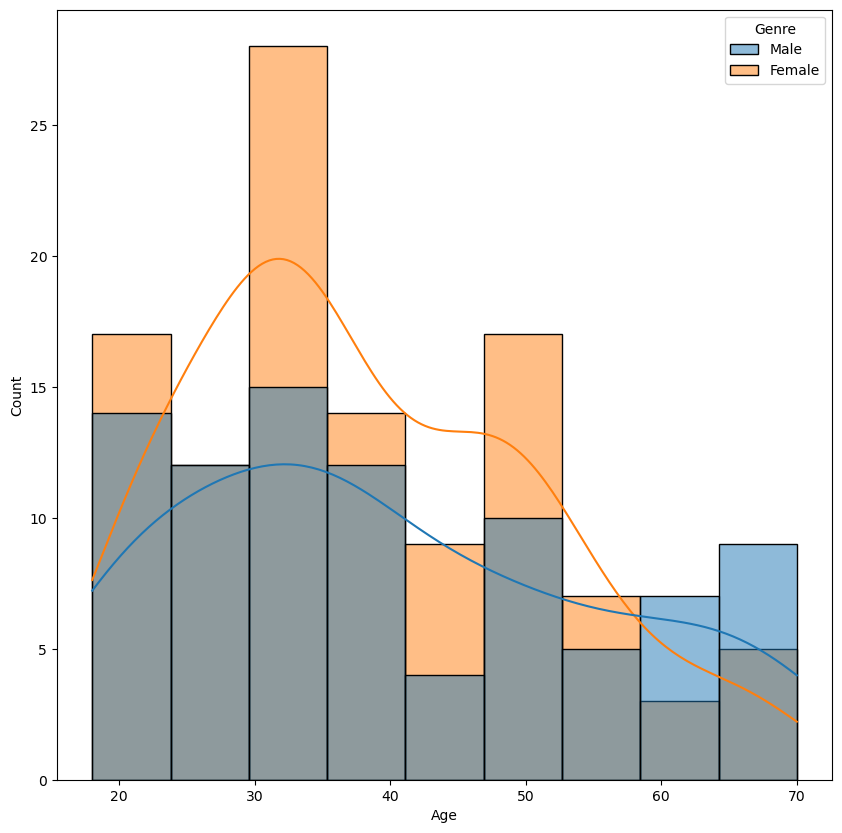

In [9]:
plt.figure(figsize = (10, 10))
sns.histplot(x = 'Age', hue = 'Genre', data = data , kde=True )

In [10]:
fig = px.pie(data, names='Genre', title='Genre',color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [11]:
fig = px.histogram(data, x="Age")
fig.show()

In [12]:
fig = px.histogram(data, x="Annual Income (k$)")
fig.show()

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

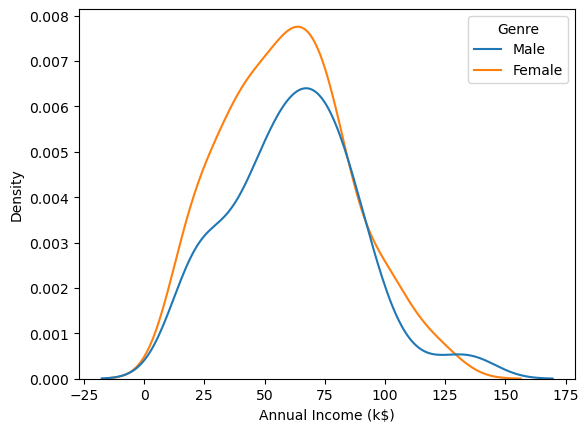

In [13]:
sns.kdeplot(data=data, x="Annual Income (k$)", hue="Genre")

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

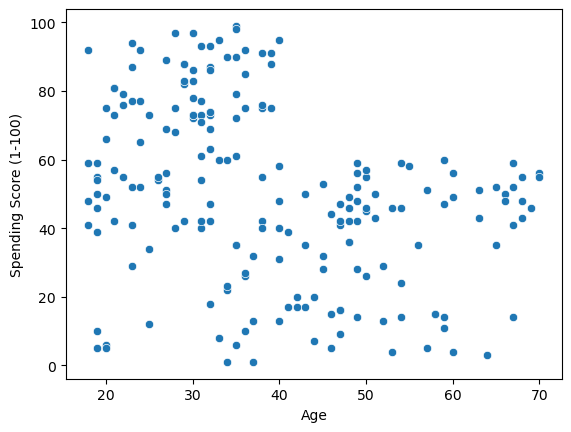

In [14]:
sns.scatterplot(data=data, x="Age", y="Spending Score (1-100)")

# cluster models

# KMeans

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

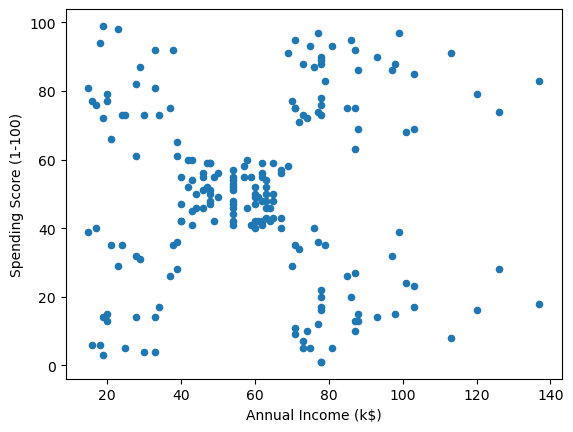

In [15]:
data.plot(kind = "scatter" , x = "Annual Income (k$)" , y="Spending Score (1-100)")

In [16]:
z=data.iloc[:,[3,4]].values

In [17]:
from sklearn.cluster import KMeans

In [18]:
km=KMeans(n_clusters= 5)

In [19]:
y_pred = km.fit_predict(z)

In [20]:
y_pred

array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0,
       3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 1, 0, 1, 4, 1, 4, 1,
       0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1], dtype=int32)

In [21]:
centroids = km.cluster_centers_
centroids

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

In [22]:
data['y'] = y_pred

In [23]:
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),y
0,1,Male,19,15,39,3
1,2,Male,21,15,81,2
2,3,Female,20,16,6,3
3,4,Female,23,16,77,2
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,4
197,198,Male,32,126,74,1
198,199,Male,32,137,18,4


# Finding correct number of cluster groups

In [24]:
sum_of_distances=[]
for k in range(1,15):
    km=KMeans(n_clusters=k)
    km.fit_predict(z)
    sum_of_distances.append(km.inertia_)
sum_of_distances

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37239.835542456036,
 30241.343617936585,
 25018.78161341407,
 21794.8856090982,
 19710.0302716608,
 17633.878680834292,
 15926.627039985106,
 14277.611237373734,
 12746.969092182328]

In [25]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'y'],
      dtype='object')

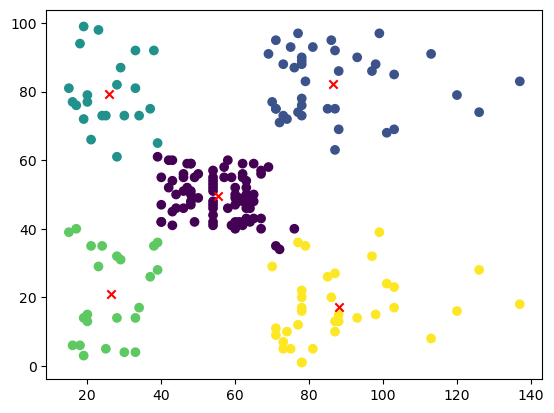

In [26]:
plt.scatter(data['Annual Income (k$)'] , data["Spending Score (1-100)"] , c = data['y'])
plt.scatter(centroids[:,0],centroids[:,1],marker="x",c="r")

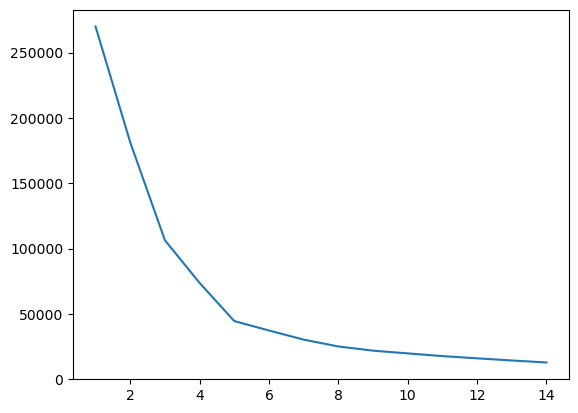

In [27]:
plt.plot(list(range(1,15)),sum_of_distances)

In [28]:
z=data.iloc[:,[3,4]]
z

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


# cluster.hierarchy

In [29]:
import scipy.cluster.hierarchy as sch

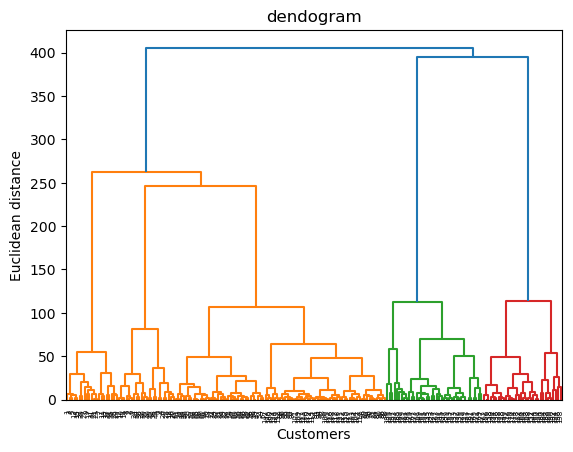

In [30]:
dendogram = sch.dendrogram(sch.linkage(z, method="ward"))
plt.title("dendogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean distance")
plt.show()

# DBSCAN

In [31]:
z_new=z.copy(deep=True)

In [32]:
from sklearn.cluster import DBSCAN

In [33]:
dbscan = DBSCAN(eps=1, min_samples=3)
dbscan.fit(z_new)

DBSCAN(eps=1, min_samples=3)

In [34]:
set(dbscan.labels_)

{-1, 0, 1, 2, 3, 4, 5}

In [35]:
len(set(dbscan.labels_))

7

In [36]:
z_new['cluster number'] = dbscan.labels_

In [37]:
z_new

,Annual Income (k$),Spending Score (1-100),cluster number
0,15,39,-1
1,15,81,-1
2,16,6,-1
3,16,77,-1
4,17,40,-1
...,...,...,...
195,120,79,-1
196,126,28,-1
197,126,74,-1
198,137,18,-1
